### Hypothesis
- 소득 수준이 비슷한 사람들은 비슷한 지역에 거주하며 군집을 이룰 것이다.
  > - job point에 따른 a~e 등급으로 구분, 소득과 무관하게 대체로 해안가에 거주
  > - job point 상위 1%인 a 등급, 북부 해안가에 집중
- 소득 수준이 높은 지역의 소매업과 요식업의 bill단가는 소득 수준이 낮은 지역에 비해 더 높을 것이다.

In [1]:
# jeju_financial_life_data.csv
original = pd.read_csv("../../01_jeju/codes/datas/jeju_financial_life_data.csv")
pd.set_option('display.max_row', 500)
pd.set_option('display.max_columns', 50)

In [2]:
pd.set_option('display.max_row', 500)
pd.set_option('display.max_columns', 50)

In [3]:
original.head()

,zip_cd,year_month,x_axis,y_axis,sex,age,job_majorc,job_smallc,job_public,job_profession,job_self,job_none,job_other,avg_income,med_income,avg_spend,avg_foreign_spend,avg_debt,avg_debt_credit,avg_debt_noneb,avg_debt_mortgage,avg_debt_deposit,avg_debt_collateral,avg_credit_rat,medium_resid_rat,large_resid_rat,vehicle_own_rat
0,63299,201902,126.565889,33.513210,1,54,0.0,0.166667,0.000000,0.000000,0.166667,0.500000,0.166667,37188000,33000000,2611619,0,24285196,11419148,8863595,55550000,0,55550000,5,-999999.0,-999999.0,0.000000
1,63560,201902,126.497121,33.247225,1,59,0.0,0.125000,0.000000,0.000000,0.375000,0.500000,0.000000,35378000,32000000,1987726,0,108571077,25896955,13317443,0,200000000,74421721,4,-999999.0,-999999.0,0.000000
2,63560,201902,126.497121,33.247225,2,49,0.0,0.250000,0.000000,0.000000,0.125000,0.625000,0.000000,32119000,34000000,3529667,172405,26424335,12015311,12015311,40833359,0,40833359,2,-999999.0,-999999.0,0.000000
3,63560,201902,126.497121,33.247225,1,54,0.0,0.181818,0.090909,0.090909,0.363636,0.272727,0.000000,64746000,68200000,4868477,12046,647716901,39952556,21558153,36697792,0,706300496,4,-999999.0,-999999.0,0.166667
4,63560,201902,126.497121,33.247225,1,49,0.0,0.250000,0.000000,0.000000,0.250000,0.500000,0.000000,29578000,29700000,5209689,0,248232725,35712501,5568751,0,0,626810674,5,-999999.0,-999999.0,0.000000


In [4]:
original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10422 entries, 0 to 10421
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   zip_cd               10422 non-null  int64  
 1   year_month           10422 non-null  int64  
 2   x_axis               10422 non-null  float64
 3   y_axis               10422 non-null  float64
 4   sex                  10422 non-null  int64  
 5   age                  10422 non-null  int64  
 6   job_majorc           10422 non-null  float64
 7   job_smallc           10422 non-null  float64
 8   job_public           10422 non-null  float64
 9   job_profession       10422 non-null  float64
 10  job_self             10422 non-null  float64
 11  job_none             10422 non-null  float64
 12  job_other            10422 non-null  float64
 13  avg_income           10422 non-null  int64  
 14  med_income           10422 non-null  int64  
 15  avg_spend            10422 non-null 

In [5]:
data = original.drop(['job_none','job_other'],axis=1)
job_df = data[['job_majorc','job_smallc','job_public','job_profession','job_self']].copy()

In [6]:
job_majorc = []
job_smallc = []
job_public = []
job_profession = []
job_self = []

for a in range(0, len(original)):
    row_sum = 0
    for i in range(0,5):
        row_sum += job_df.loc[a][i]
        
    if row_sum == 0:
        job_majorc.append(0.0)
        job_smallc.append(0.0)
        job_public.append(0.0)
        job_profession.append(0.0)
        job_self.append(0.0)
    else:
        job_majorc.append(job_df.loc[a][0]/row_sum)
        job_smallc.append(job_df.loc[a][1]/row_sum)
        job_public.append(job_df.loc[a][2]/row_sum)
        job_profession.append(job_df.loc[a][3]/row_sum)
        job_self.append(job_df.loc[a][4]/row_sum)

len(job_majorc),len(job_smallc), len(job_public),len(job_profession),len(job_self)

(10422, 10422, 10422, 10422, 10422)

In [7]:
job_df.head()

,job_majorc,job_smallc,job_public,job_profession,job_self
0,0.0,0.166667,0.000000,0.000000,0.166667
1,0.0,0.125000,0.000000,0.000000,0.375000
2,0.0,0.250000,0.000000,0.000000,0.125000
3,0.0,0.181818,0.090909,0.090909,0.363636
4,0.0,0.250000,0.000000,0.000000,0.250000


In [8]:
job_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10422 entries, 0 to 10421
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   job_majorc      10422 non-null  float64
 1   job_smallc      10422 non-null  float64
 2   job_public      10422 non-null  float64
 3   job_profession  10422 non-null  float64
 4   job_self        10422 non-null  float64
dtypes: float64(5)
memory usage: 407.2 KB


In [9]:
job_df['job_majorc']=job_majorc
job_df['job_smallc']=job_smallc
job_df['job_public']=job_public
job_df['job_profession']=job_profession
job_df['job_self']=job_self

In [10]:
data['job_majorc']=job_majorc
data['job_smallc']=job_smallc
data['job_public']=job_public
data['job_profession']=job_profession
data['job_self']=job_self

<AxesSubplot:>

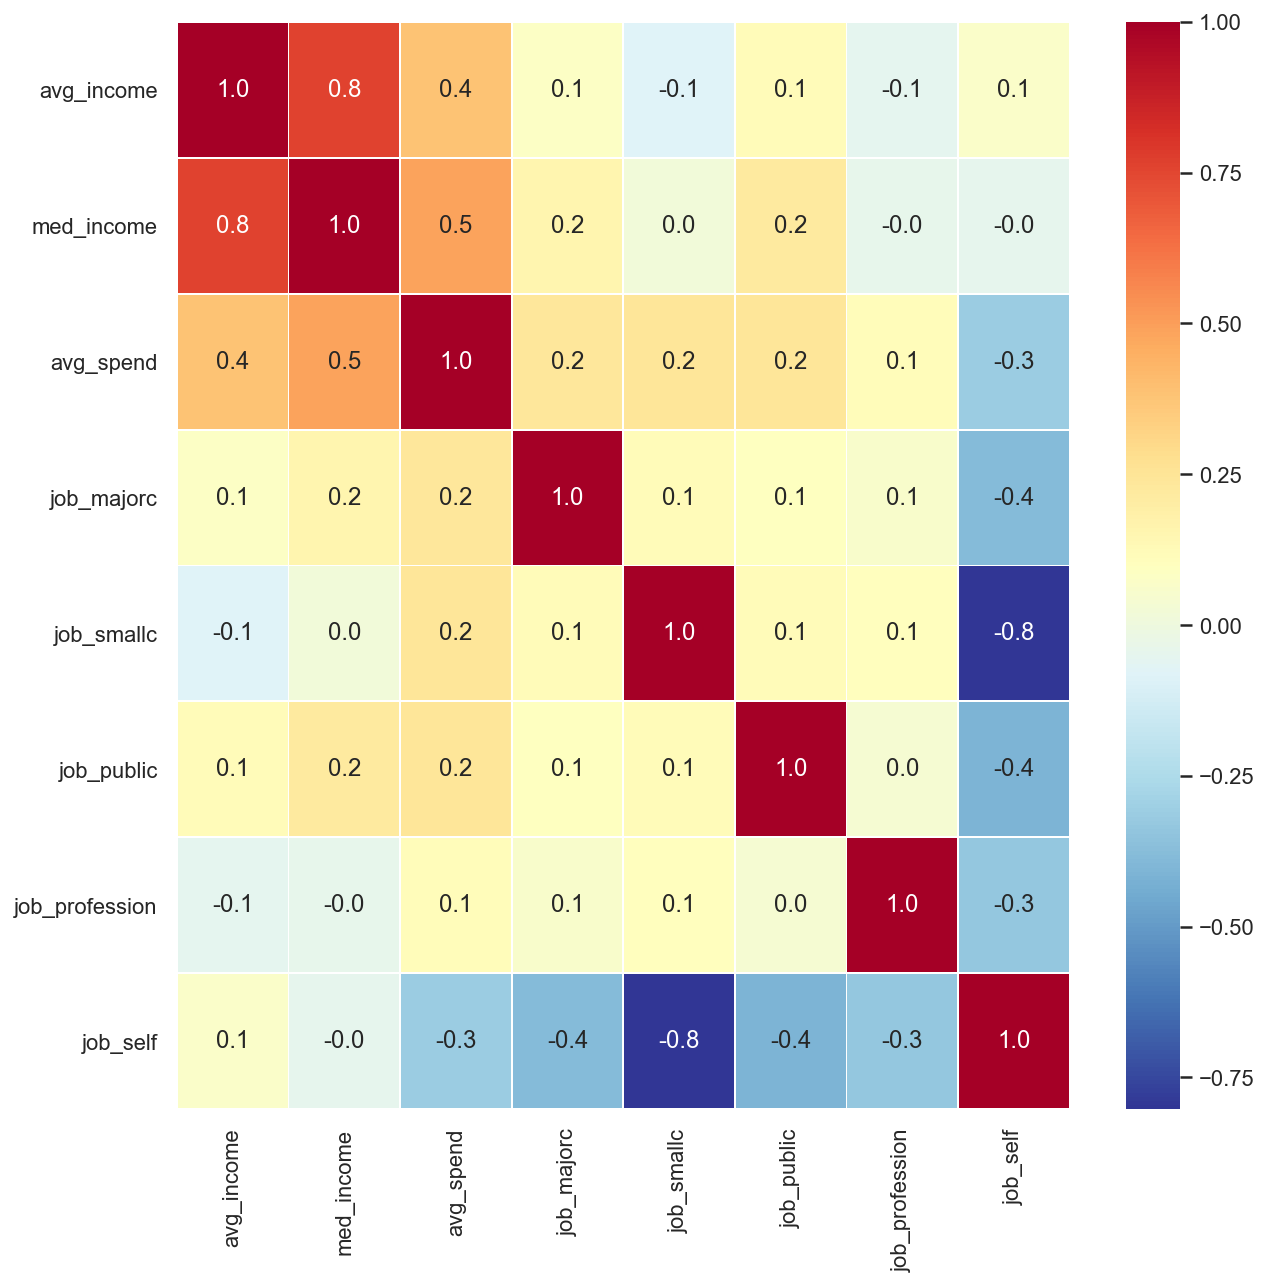

In [11]:
income_job = data[['avg_income','med_income','avg_spend','job_majorc','job_smallc','job_public','job_profession','job_self']].copy()
plt.figure(figsize=(10,10))
sns.heatmap(income_job.corr(),  annot = True, fmt ='.1f', linewidths=0.5, cmap='RdYlBu_r')

In [12]:
# job_points 컬럼 추가: 직업군별 가중치
# job_points = [100, 68, 92, 100, 60]
job_points = [100, 68, 92, 100, 60]

sum_list = []
for a in range(0, len(original)):
    row_sum = 0
    for i in range(0,5):
        row_sum += job_df.loc[a][i]*job_points[i]
    sum_list.append(round(row_sum,2))

data['job_points'] = sum_list

data.head()

,zip_cd,year_month,x_axis,y_axis,sex,age,job_majorc,job_smallc,job_public,job_profession,job_self,avg_income,med_income,avg_spend,avg_foreign_spend,avg_debt,avg_debt_credit,avg_debt_noneb,avg_debt_mortgage,avg_debt_deposit,avg_debt_collateral,avg_credit_rat,medium_resid_rat,large_resid_rat,vehicle_own_rat,job_points
0,63299,201902,126.565889,33.513210,1,54,0.0,0.500000,0.000,0.000,0.500000,37188000,33000000,2611619,0,24285196,11419148,8863595,55550000,0,55550000,5,-999999.0,-999999.0,0.000000,64.00
1,63560,201902,126.497121,33.247225,1,59,0.0,0.250000,0.000,0.000,0.750000,35378000,32000000,1987726,0,108571077,25896955,13317443,0,200000000,74421721,4,-999999.0,-999999.0,0.000000,62.00
2,63560,201902,126.497121,33.247225,2,49,0.0,0.666667,0.000,0.000,0.333333,32119000,34000000,3529667,172405,26424335,12015311,12015311,40833359,0,40833359,2,-999999.0,-999999.0,0.000000,65.33
3,63560,201902,126.497121,33.247225,1,54,0.0,0.250000,0.125,0.125,0.500000,64746000,68200000,4868477,12046,647716901,39952556,21558153,36697792,0,706300496,4,-999999.0,-999999.0,0.166667,71.00
4,63560,201902,126.497121,33.247225,1,49,0.0,0.500000,0.000,0.000,0.500000,29578000,29700000,5209689,0,248232725,35712501,5568751,0,0,626810674,5,-999999.0,-999999.0,0.000000,64.00


In [13]:
# 무직과 기타만 있던 행 삭제
drop_zero = data[data['job_points']==0].index
data = data.drop(drop_zero)

#### 1. job_points 구간을 나누어 표시

In [14]:
# original 데이터 10422개, 무직/기타 row drop 후 10255개
len(data)

10255

In [16]:
import plotly.express as px
import chart_studio.plotly as py
import cufflinks as cf
cf.go_offline(connected=True)
px.bar(job_df.loc[0:].sum(), title='직업군별 비중')

In [17]:
# 대기업/중소기업/공기업/전문직/자영업 순 비중
# 5.75%, 34.95%, 7.3%, 3.95%, 48.05%
totalsum = job_df.iloc[0:].sum().sum()
a = [np.round(each/totalsum*100,2) for each in job_df.iloc[0:].sum()]
a

[5.75, 34.95, 7.3, 3.95, 48.05]

In [18]:
# !pip install chart_studio
# !pip install cufflinks

In [19]:
# job_points의 4분위수 확인
# count    10255.000000
# mean        69.010660
# std          7.018413
# min         60.000000
# 25%         62.670000
# 50%         68.440000
# 75%         73.710000
# max        100.000000
fig = px.box(data['job_points'], y = 'job_points',width=400, height=500)
fig.show()

In [20]:
data['job_points'].describe()

count    10255.000000
mean        69.010660
std          7.018413
min         60.000000
25%         62.670000
50%         68.440000
75%         73.710000
max        100.000000
Name: job_points, dtype: float64

In [21]:
# job points를 기준으로 총 5개의 level로 분리
# 상위 1% (a등급), 4분위수 기준으로 나머지 4개 등급 분리(b~e등급)
job_level = []
level = ['e','d', 'c', 'b', 'a']
q = [0.25, 0.5, 0.75, 0.99, 1]

for i in range(0, len(original)):
    for index in range(0, 5):
        try:
            if data['job_points'].loc[i] <= data['job_points'].quantile(q[index]):
                job_level.append(level[index])
                break
        except KeyError:
            pass
len(job_level)

10255

In [22]:
# data 데이터 프레임에 job level 컬럼 추가
data['job_level'] = job_level
data[['job_level','job_points']].head()

,job_level,job_points
0,d,64.00
1,e,62.00
2,d,65.33
3,c,71.00
4,d,64.00


In [23]:
# 피벗1: job_level에 따른 age, job_points, sex (zip_cd는 개수 확인용)
job_lv_pivot = pd.pivot_table(data,
                             index = ['job_level'],
                             values = ['job_points','age','sex','zip_cd'],
                              aggfunc={'job_points':'mean','age':'mean','sex':'mean','zip_cd':'median','zip_cd':'count'},
                             )
job_lv_pivot

,age,job_points,sex,zip_cd
job_level,,,,
a,29.679612,94.833981,1.563107,103
b,36.977162,77.617084,1.504078,2452
c,46.768240,71.166633,1.420211,2563
d,54.678988,65.946506,1.487938,2570
e,76.066615,60.668769,1.542657,2567


In [24]:
job_lv_pivot['age']

job_level
a    29.679612
b    36.977162
c    46.768240
d    54.678988
e    76.066615
Name: age, dtype: float64

In [25]:
# job_points과 age는 반비례
# 남여 비중은 대체로 1.5를 기준으로 크게 벗어나지 않는 것으로 보아, 성비가 거의 50:50에 가까움
from plotly.subplots import make_subplots
import plotly.graph_objects as go
fig = make_subplots(rows=2, cols=1, shared_xaxes=True, vertical_spacing=0.05, x_title='Job points')
fig.add_trace(go.Scatter(name='Age', x = job_lv_pivot['job_points'], y = job_lv_pivot['age']), row = 1, col =1)
fig.add_trace(go.Scatter(name='Sex\n(Male:1,Female:2)',x = job_lv_pivot['job_points'], y = job_lv_pivot['sex']), row = 2, col =1)
fig.update_layout(height=400, width=700, title_text="<Correlation between Job points and Age/Sex>")
fig.show()

In [26]:
# 피벗2 : job_level에 따른 직업군 비중
job_lv_pivot2 = pd.pivot_table(data,
                             index = ['job_level'],
                             values = ['job_majorc','job_smallc','job_public','job_profession','job_self'],
                             margins=True)
job_lv_pivot2

,job_majorc,job_profession,job_public,job_self,job_smallc
job_level,,,,,
a,0.360009,0.256588,0.296625,0.001942,0.084836
b,0.121942,0.099760,0.155834,0.152205,0.470259
c,0.074421,0.038395,0.094219,0.338079,0.454885
d,0.023855,0.013428,0.035700,0.512903,0.414114
e,0.000559,0.000446,0.000926,0.923221,0.074848
All,0.057491,0.039503,0.072966,0.480544,0.349497


In [27]:
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

In [28]:
job_lv_pivot2[:5]

,job_majorc,job_profession,job_public,job_self,job_smallc
job_level,,,,,
a,0.360009,0.256588,0.296625,0.001942,0.084836
b,0.121942,0.099760,0.155834,0.152205,0.470259
c,0.074421,0.038395,0.094219,0.338079,0.454885
d,0.023855,0.013428,0.035700,0.512903,0.414114
e,0.000559,0.000446,0.000926,0.923221,0.074848


In [29]:
import plotly.express as px
fig = px.bar(job_lv_pivot2[:5],barmode='stack',
             orientation='h',
             width=900,
             title = 'Job level에 따른 직업군 비중 비교')
fig.show()

In [30]:
# job_level 별 산점도
# 모든 항목이 해안가를 둘러싸고 거주중
px.scatter_3d(data, x = "x_axis", y = "y_axis", z= 'job_points', size='job_points', color='job_level', size_max = 10)

In [37]:
# 등급별 지도에 표시
scatter_a = px.scatter(data[data['job_level']=='a'], x = "x_axis", y = "y_axis", size='job_points', size_max = 10)
scatter_a.show()

In [32]:
scatter_b = px.scatter(data[data['job_level']=='b'], x = "x_axis", y = "y_axis", size='job_points', size_max = 10)
scatter_b.show()

In [33]:
scatter_c = px.scatter(data[data['job_level']=='c'], x = "x_axis", y = "y_axis", size='job_points', size_max = 10)
scatter_c.show()

In [34]:
scatter_d = px.scatter(data[data['job_level']=='d'], x = "x_axis", y = "y_axis", size='job_points', size_max = 10)
scatter_d.show()

In [35]:
scatter_e = px.scatter(data[data['job_level']=='e'], x = "x_axis", y = "y_axis", size='job_points', size_max = 10)
scatter_e.show()